In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
mnist_0 = pd.read_csv("./sample_data/mnist_train_small.csv", sep=',',header = None)
mnist_0.rename(columns={0 : 'label'}, inplace=True)

labels = mnist_0['label']

# Drop the label
data = mnist_0.drop("label",axis=1)


In [ ]:
print(data.shape)
print(labels.shape)

(20000, 784)
(20000,)


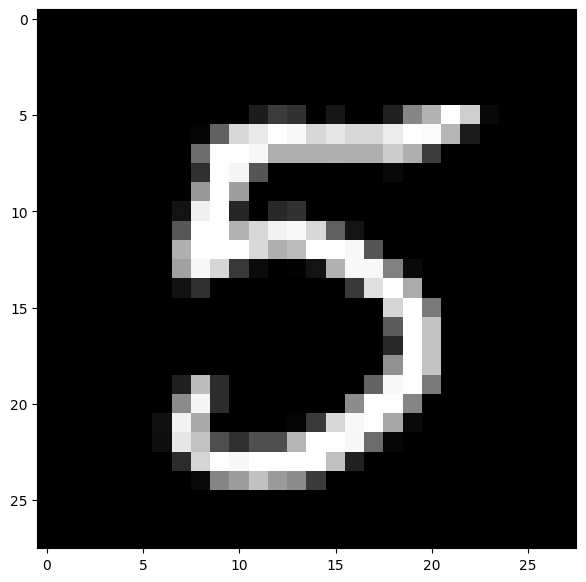

5


In [ ]:
# display number.
plt.figure(figsize=(7,7))
idx = 1

grid_data = data.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(labels[idx])

In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(20000, 784)


In [ ]:
#co-variance matrix: A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( f"The shape of co-variance matrix: {covar_matrix.shape}")

The shape of co-variance matrix: (784, 784)


In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh

# eigvals are in ascending order
# need the top 2 (782 and 783) eigenvalues
# vector[1] is the 1st eigenvector
values, vectors = eigh(covar_matrix, subset_by_index=[782, 783])

print(f"Shape of eigenvectors: {vectors.shape}")
vectors = vectors.T

print(f"Updated shape of eigenvectors: {vectors.shape}")

Shape of eigenvectors: (784, 2)
Updated shape of eigenvectors: (2, 784)


In [ ]:
# projecting the original data sample on the 2D plane.

new_coordinates = np.matmul(vectors, sample_data.T)

print (f"new matrix shape: {vectors.shape}X{sample_data.T.shape} = {new_coordinates.shape}")

new matrix shape: (2, 784)X(784, 20000) = (2, 20000)


In [ ]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("2nd_principal", "1st_principal", "label"))
print(dataframe.head())

   2nd_principal  1st_principal  label
0      -0.055053      10.820653    6.0
1       1.137359       2.002758    5.0
2      -1.708229       3.720519    7.0
3       9.445983       2.713128    9.0
4       4.498352       3.884133    5.0


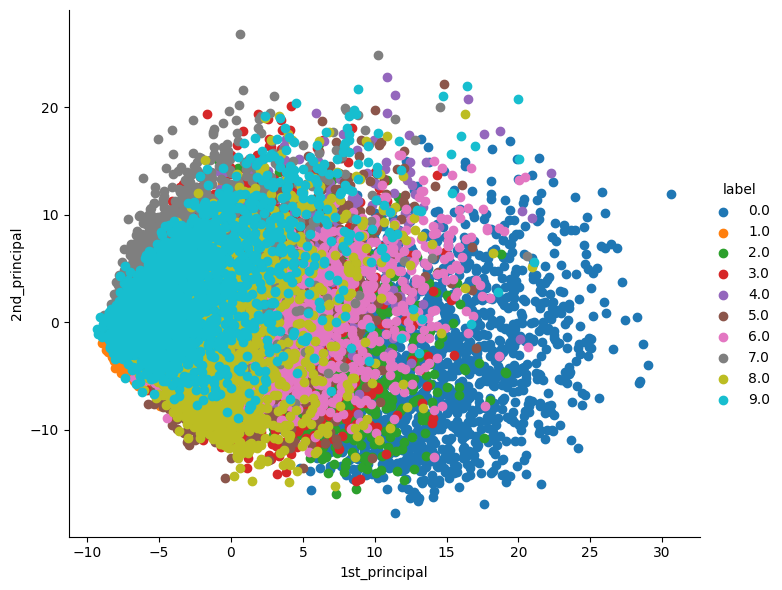

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", height=6, aspect=1.2).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## With Scikit-Learn

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print(f"shape of pca_data: {pca_data.shape}")

shape of pca_data: (20000, 2)


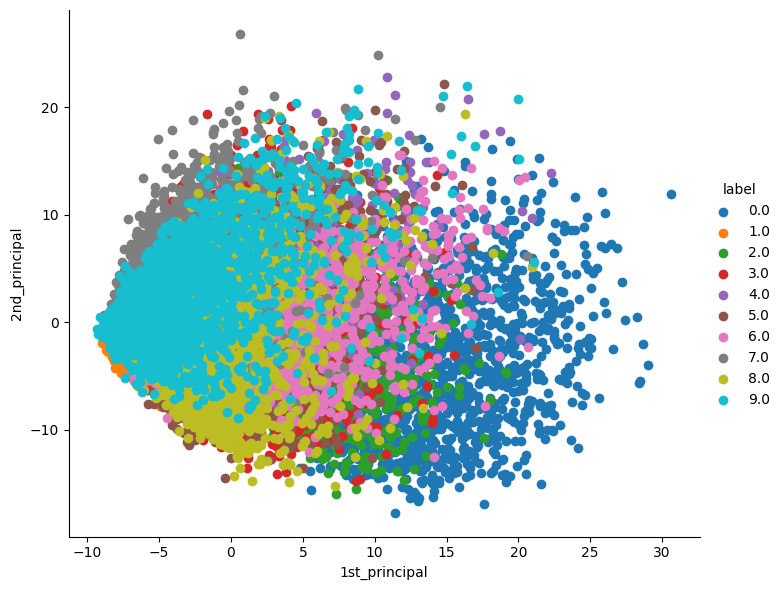

In [ ]:
# attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label", height=6, aspect=1.2).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## MNIST Data: Finding Right Number of Dimensions

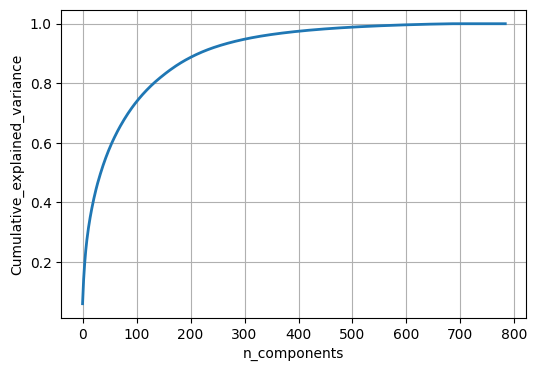

In [ ]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# 90% of variance is expalined from 200 dimensions